# Pymaceuticals Inc.
---

### Analysis

- There is a positive correlation between the weight of the mice and the tumor volume.
- Capomulin and Ramicane were the most tested drugs, and also had the lowest mean tumor volumes 
- Infubinol was the only drug with an outlier, and Ceftamin had the largest variability amongst the four drugs.

## Prepare the Data

In [50]:
# dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# read in files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combine both into one dataframe
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# display df preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
# count the number of mice
mouse_count = merged_df["Mouse ID"].nunique()
mouse_count

249

In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_df["Mouse ID"].value_counts())
clean_mice

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
regimen_med = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
regimen_var = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
regimen_std = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
regimen_sem = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
stats_sum_df = pd.DataFrame ({
    "Mean Tumor Volume": regimen_mean,
    "Median Tumor Volume": regimen_med,
    "Tumor Volume Variance": regimen_var,
    "Tumor Volume Std. Dev.": regimen_std,
    "Tumor Volume Std. Err.": regimen_sem
})
stats_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
agg_stats_sum_df = clean_df.set_index(["Drug Regimen"]).groupby('Drug Regimen')[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
agg_stats_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Rows')

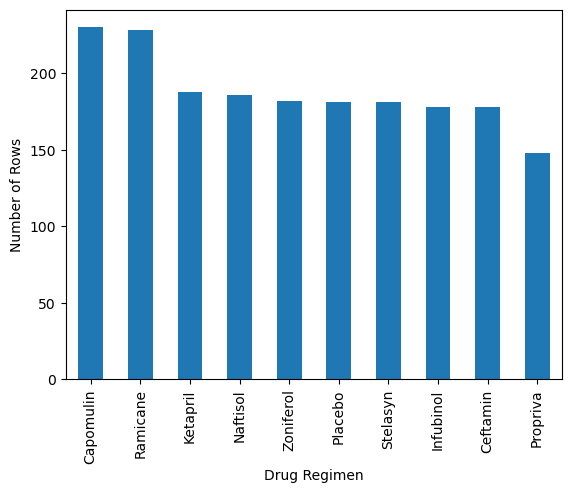

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df["Drug Regimen"].value_counts().plot(kind = "bar")
plt.ylabel("Number of Rows")

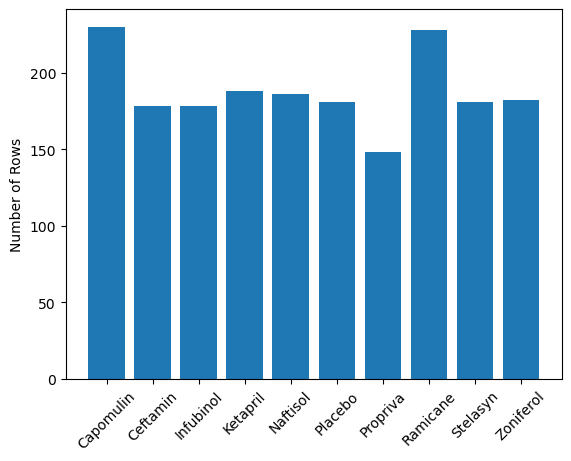

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()

plt.figure()
plt.bar(counts.index, counts.values)
plt.xticks(rotation = 45)
plt.ylabel("Number of Rows")
plt.show()

Text(0, 0.5, 'Sex')

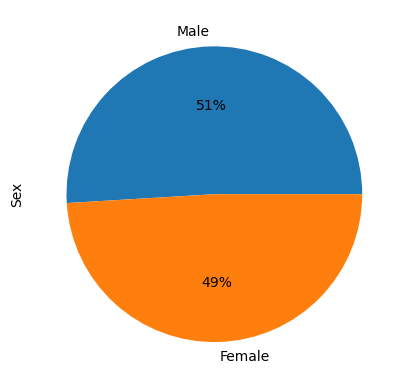

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df['Sex'].value_counts()
gender_counts.plot(kind = "pie", autopct='%1.0f%%')
plt.ylabel("Sex")

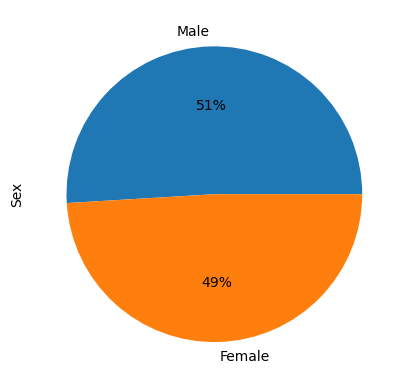

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels = gender_counts.index, autopct = "%1.0f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_time = max_time.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df2 = max_time.merge(clean_df, on=["Mouse ID", "Timepoint"], how = "left")
merged_df2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [63]:
# quartiles and IQR
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df2.loc[merged_df2['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # set variables
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    # print results
    print(f"{drug} Regimen")
    print(f"The lower quartile of {drug} tumors: {lowerq}")
    print(f"The upper quartile of {drug} tumors: {upperq}")
    print(f"The interquartile range of {drug} tumors: {iqr}")
    print('--'*30) 


Capomulin Regimen
The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
------------------------------------------------------------
Ramicane Regimen
The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
------------------------------------------------------------
Infubinol Regimen
The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
------------------------------------------------------------
Ceftamin Regimen
The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
------------------------------------------------------------


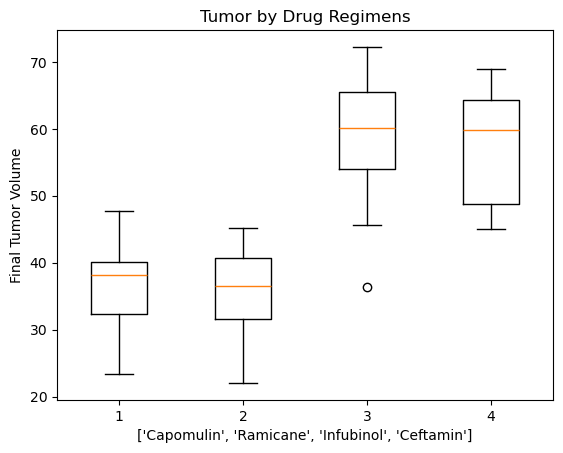

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_title("Tumor by Drug Regimens")
ax.set_ylabel("Final Tumor Volume")
ax.set_xlabel(treatments)
ax.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plot

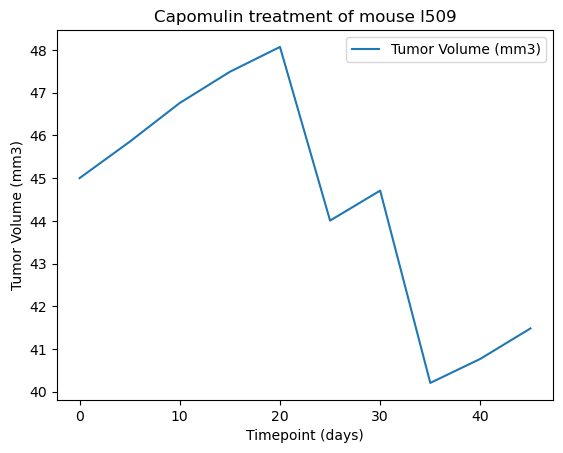

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == "l509"]
mouse_df.plot("Timepoint", "Tumor Volume (mm3)")

plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

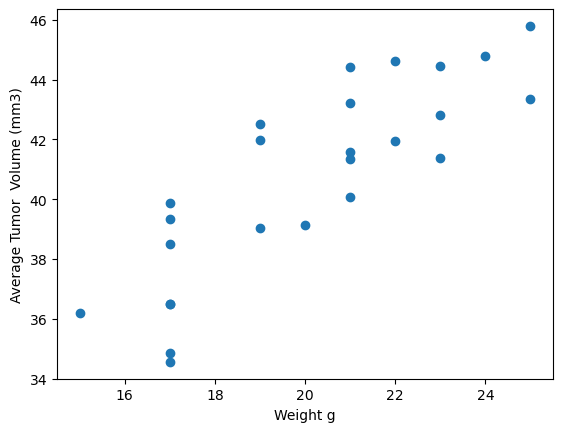

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean(numeric_only=True)

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.ylabel("Average Tumor  Volume (mm3)")
plt.xlabel("Weight g")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
print(f'the correlation between mouse weight and tumor volume is {round(corr[0],2)}')


the correlation between mouse weight and tumor volume is 0.84


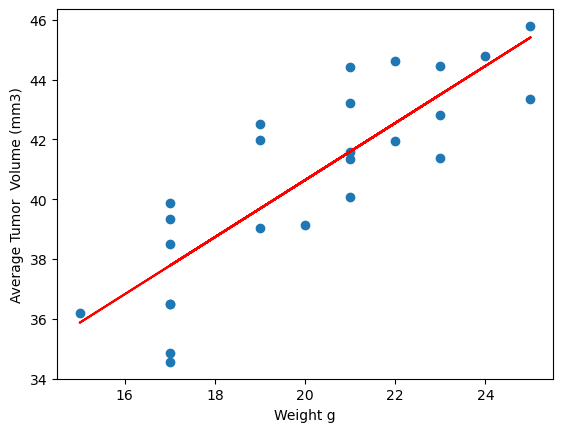

In [ ]:
#plot linear regression on top of scatter plot
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])
regress_val = capomulin_average["Weight (g)"] * slope + intercept

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average["Weight (g)"], regress_val, "r-")
plt.ylabel("Average Tumor  Volume (mm3)")
plt.xlabel("Weight g")
plt.show()